# Importação das Bibliotecas Necessárias

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

from scipy import stats as st

# 1. Ler os arquivos


In [3]:
data0 = pd.read_csv('geo_data_0.csv')
data1 = pd.read_csv('geo_data_1.csv')
data2 = pd.read_csv('geo_data_2.csv')

In [4]:
def analise_inicial(df):
    print("Info:")
    df.info()
    print("\n")

    print("Shape:")
    print(df.shape)
    print("\n")

    print("Valores nulos:")
    print(df.isna().sum())
    print("\n")

    print("Linhas duplicadas:")
    print(df.duplicated().sum())
    print("\n")

# Data0
analise_inicial(data0)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Shape:
(100000, 5)


Valores nulos:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Linhas duplicadas:
0




In [5]:
# Data1
analise_inicial(data1)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Shape:
(100000, 5)


Valores nulos:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Linhas duplicadas:
0




In [6]:
# Data2
analise_inicial(data2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Shape:
(100000, 5)


Valores nulos:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Linhas duplicadas:
0




Em nenhum dos dataframes há linhas duplicadas ou valores nulos. Todos eles são íntegros.

# 2. Construir modelo para predizer o volume de reservas nos poços

## 2.1 Conjunto de dados data0

In [7]:
X = data0.drop(columns=['id', 'product'])
y = data0['product']

In [8]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
y_pred_mean = y_pred.mean()

In [9]:
data0_inter = pd.DataFrame({'product': y_test, 'predicted': y_pred})
data0_final = data0_inter.merge(data0, left_index=True, right_index=True).drop(columns=['f0','f1','f2','product_y']).reset_index(drop=True)
data0_final

,product_x,predicted,id
0,122.073350,101.901017,7C6bA
1,48.738540,78.217774,dVxsn
2,131.338088,115.266901,1Gm3l
3,88.327757,105.618618,Nzg1t
4,36.959266,97.980185,Z7b4F
...,...,...,...
24995,148.821520,105.076959,pXFCs
24996,123.454003,74.768176,tf6nq
24997,91.945213,82.544397,pv8T0
24998,149.295563,81.826689,nol4A


In [10]:
print(f'A predição de volume médio é de {y_pred_mean}. \nO REQM é de {rmse}.')

A predição de volume médio é de 92.3987999065777. 
O REQM é de 37.756600350261685.


## Criação da função

In [11]:
def oil_prediction(data):
    X = data.drop(columns=['id','product'])
    y = data['product']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    df_data = pd.DataFrame({'product': y_test, 'predicted': y_pred})

    data_final = df_data.merge(data, left_index=True, right_index=True).drop(columns=['f0','f1','f2','product_y']).reset_index(drop=True)

    vol_med = df_data['predicted'].mean()

    return y_pred, rmse, data_final, vol_med

In [12]:
results_1 = oil_prediction(data1)

In [13]:
data1_final = results_1[2]
data1_final

,product_x,predicted,id
0,0.000000,0.844738,fYVDK
1,53.906522,52.921612,3SQcq
2,134.766305,135.110385,hQ1gJ
3,107.813044,109.494863,Y4vux
4,0.000000,-0.047292,H1NUw
...,...,...,...
24995,107.813044,108.351600,Vn3pL
24996,53.906522,53.604049,zZe7H
24997,26.953261,26.708734,iefIy
24998,110.992147,109.823087,CFT5B


In [14]:
print(f'O volume médio de reservas é de {results_1[3]}')
print(f'O REQM é de {results_1[1]}')

O volume médio de reservas é de 68.71287803913762
O REQM é de 0.890280100102884


## Conjunto de dados data2

In [15]:
results_2 = oil_prediction(data2)

In [16]:
data2_final = results_2[2]
data2_final

,product_x,predicted,id
0,117.441301,98.301916,sPjbT
1,47.841249,101.592461,1u4uo
2,45.883483,52.449099,kZ6HO
3,139.014608,109.922127,gCZGK
4,84.004276,72.411847,rqJHx
...,...,...,...
24995,40.797226,102.764169,hMnQH
24996,87.144239,93.431823,KGq37
24997,52.039812,64.098390,CKCjb
24998,136.961454,83.764135,ANcQx


In [17]:
print(f'O volume médio de reservas é de {results_2[3]}')
print(f'O REQM é de {results_2[1]}')

O volume médio de reservas é de 94.77102387765939
O REQM é de 40.14587231134218


# 3. Escolher os poços que têm os maiores valores estimados


### 3.1 Armazenar os valores necessários para os cálculos em variáveis separadas

In [18]:
investimento = 100000000
pocos = 200
limite = 500000
unidades_limite = 111.1
valor_barril = 4.5
valor_unidade = 4500


### 3.2 Comparação do volume médio por região com os limites

In [19]:
# Região 0

data0_media = data0_final['predicted'].mean()
data1_media = results_1[3]
data2_media = results_2[3]

print(f'O volume médio de reservas da região 0 é de {data0_media}, \no volume médio de reservas da região 1 é de {data1_media}, \no volume médio de reservas da região 2 é de {data2_media}')

O volume médio de reservas da região 0 é de 92.3987999065777, 
o volume médio de reservas da região 1 é de 68.71287803913762, 
o volume médio de reservas da região 2 é de 94.77102387765939


### 3.3 Forneça conclusões

Nenhuma das três regiões possui uma média de unidades necessária para evitar prejuízos, quando calculado pela média de todas as predições (2.500 poços).


# 4. Escolher a região com o maior lucro total para os poços selecionados


### 4.1 Escolher os 200 poços com os valores mais altos previstos para cada uma das regiões


In [20]:
def top200(data):
    top200 = data.sort_values(by='predicted', ascending=False).iloc[:200].reset_index(drop=True)
    return top200

In [21]:
reg_0_top200 = top200(data0_final)
reg_1_top200 = top200(data1_final)
reg_2_top200 = top200(data2_final)

In [22]:
top_200_df = pd.DataFrame({'Região 0': reg_0_top200['predicted'], 'Região 1': reg_1_top200['predicted'], 'Região 2': reg_2_top200['predicted']})

### 3.3 Calcule o lucro potencial dos melhores 200 poços por região.

In [23]:
def lucro_por_região(data, valor_unidade):
    lucro = []
    for _, row in data.iterrows():
        luc = row['predicted'] * valor_unidade
        lucro.append(luc)
    return lucro


In [24]:
regiao_0 = lucro_por_região(reg_0_top200, valor_unidade)
regiao_1 = lucro_por_região(reg_1_top200, valor_unidade)
regiao_2 = lucro_por_região(reg_2_top200, valor_unidade)

In [25]:
len(regiao_0), len(regiao_1), len(regiao_2)

(200, 200, 200)

In [26]:
lucro = pd.DataFrame({'Região 0': regiao_0, 'Região 1': regiao_1, 'Região 2': regiao_2})
lucro

,Região 0,Região 1,Região 2
0,794412.467126,629924.746213,767381.442244
1,793235.294386,628653.615486,763529.995038
2,779622.767428,628274.449800,743853.257174
3,777612.184231,627816.457339,740762.530366
4,777352.394998,627624.952638,737837.998979
...,...,...,...
195,661286.937690,622927.521654,641742.708851
196,661269.438402,622923.749578,641532.938553
197,661263.673315,622919.195337,641162.375973
198,661259.315693,622909.565248,640679.478318


In [27]:
total_0 = lucro['Região 0'].sum()
total_1 = lucro['Região 1'].sum()
total_2 = lucro['Região 2'].sum()
print(f'O lucro potencial total da região 0 é de {total_0}')
print(f'O lucro potencial total da região 1 é de {total_1}')
print(f'O lucro potencial total da região 2 é de {total_2}')
print(f'A região com o maior lucro potecial é a Região 0')

O lucro potencial total da região 0 é de 138966584.79666147
O lucro potencial total da região 1 é de 124869381.1499908
O lucro potencial total da região 2 é de 133779815.13714948
A região com o maior lucro potecial é a Região 0


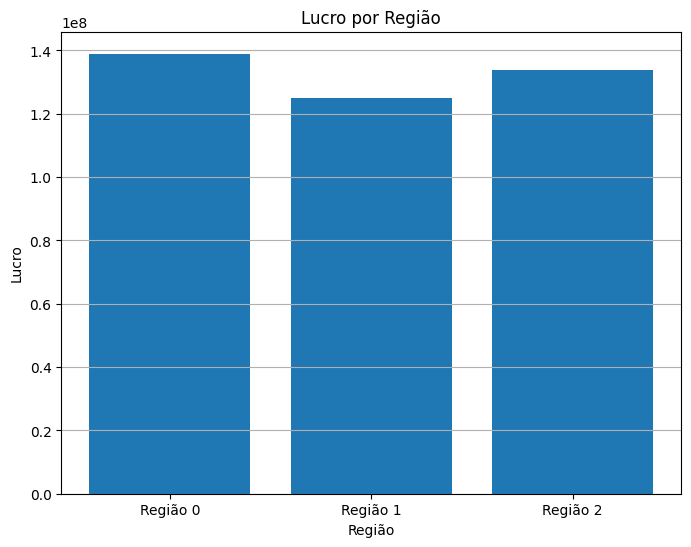

In [28]:

Região = ['Região 0', 'Região 1', 'Região 2']
Lucro = [total_0, total_1, total_2]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(Região, Lucro)

# Add labels and title
plt.xlabel('Região')
plt.ylabel('Lucro')
plt.title('Lucro por Região')
plt.grid(axis='y')

plt.show()

# 5. Cáculo do risco

## 5.1 Bootstrapping com 1000 amostrar para encontrar a distribuição de lucros


In [29]:
def lucro_por_regiao(data, num_amostras=1000):
    lucros = []
    for _ in range(num_amostras):
        amostra = data.sample(frac=1, replace=True)
        lucro = (amostra['predicted'] * 4500).sum()
        lucros.append(lucro)


    return lucros

In [30]:
regiao_0_boot = lucro_por_regiao(data0_final)
regiao_1_boot = lucro_por_regiao(data1_final)
regiao_2_boot = lucro_por_regiao(data2_final)

In [31]:
len(regiao_0_boot), len(regiao_1_boot), len(regiao_2_boot)

(1000, 1000, 1000)

In [32]:
lucro_bootstrapped = pd.DataFrame({'Região 0': regiao_0_boot, 'Região 1': regiao_1_boot, 'Região 2': regiao_2_boot})
lucro_bootstrapped

,Região 0,Região 1,Região 2
0,1.040238e+10,7.694631e+09,1.066318e+10
1,1.039214e+10,7.700131e+09,1.064254e+10
2,1.040948e+10,7.708979e+09,1.066405e+10
3,1.037966e+10,7.712264e+09,1.067013e+10
4,1.039828e+10,7.667733e+09,1.063276e+10
...,...,...,...
995,1.041056e+10,7.723898e+09,1.066103e+10
996,1.037747e+10,7.709878e+09,1.065690e+10
997,1.040449e+10,7.686779e+09,1.068726e+10
998,1.038891e+10,7.728795e+09,1.064935e+10


In [33]:
total_0_boot = lucro_bootstrapped['Região 0'].sum()
total_1_boot = lucro_bootstrapped['Região 1'].sum()
total_2_boot = lucro_bootstrapped['Região 2'].sum()
print(f'O lucro potencial total da região 0 é de {total_0_boot}, \no lucro potencial total da região 1 é de {total_1_boot}, \no lucro potencial total da região 2 é de {total_2_boot}')


O lucro potencial total da região 0 é de 10395509062817.582, 
o lucro potencial total da região 1 é de 7729609188173.836, 
o lucro potencial total da região 2 é de 10661705437494.354


## 5.2 Lucro médio, intervalo de confiança 95% e risco de prejuízo. Prejuízo é um lucro negativo, calcular como probabilidade e depois expressar como porcentagem

In [34]:
def estatisticas_regiao(data, n_bootstrap=1000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(sample.mean())

    lucro_medio = np.mean(bootstrap_means)
    intervalo_de_confianca = np.percentile(bootstrap_means, [2.5, 97.5])
    risco_de_prejuizo = (np.array(bootstrap_means) < 0).mean() * 100

    return lucro_medio, intervalo_de_confianca, risco_de_prejuizo


results = {}
for region, profits in top_200_df.items():
    lucro_medio, intervalo_de_confianca, risco_de_prejuizo = estatisticas_regiao(profits)
    results[region] = {
        'Lucro médio': lucro_medio,
        'Intervalo de Confiança 95%': intervalo_de_confianca,
        'Risco de Prejuízo (%)': risco_de_prejuizo
    }


results_df = pd.DataFrame(results)
print(results_df)




                                                            Região 0  \
Lucro médio                                               154.412252   
Intervalo de Confiança 95%  [153.51443804201674, 155.31258729218123]   
Risco de Prejuízo (%)                                            0.0   

                                                            Região 1  \
Lucro médio                                               138.742507   
Intervalo de Confiança 95%  [138.70717070620017, 138.78054977226276]   
Risco de Prejuízo (%)                                            0.0   

                                                            Região 2  
Lucro médio                                                148.63518  
Intervalo de Confiança 95%  [147.92031444153778, 149.41813221485586]  
Risco de Prejuízo (%)                                            0.0  


In [40]:
def train_and_evaluate_model(data):
    features = data.drop(columns=["id", "product"], axis=1)
    target = data["product"]

    features_train,features_valid,target_train,target_valid = train_test_split(
        features,
        target,
        test_size= 0.25
    )

    model = LinearRegression()
    model.fit(features_train,target_train)
    predict_date = model.predict(features_valid)


    rmse = root_mean_squared_error(target_valid, predict_date)


    mean_reserve= predict_date.mean()

    output= pd.DataFrame(dict(predicted_value=predict_date, real_value=target_valid))
    return output

In [41]:
regions = ["region_0", "region_1", "region_2"]
datas = [data0, data1, data2]
predict_region = {}

for data, region in zip(datas, regions):
    predict_region[region] = train_and_evaluate_model(data)

In [43]:
def calculate_profit(df):
    best_wells = df.sort_values(by="predicted_value", ascending=False)['real_value'].head(200)
    total_volume = best_wells.sum()
    potential_profit = (total_volume * revenue_per_product_unit) - development_cost
    return potential_profit

In [44]:
revenue_per_product_unit = 4500
development_cost = 100000000

In [45]:
def calculate_bootstrap(
    data,
    revenue_per_barrel=revenue_per_product_unit,
    development_cost_per_well=development_cost,
    total_samples=1000,
    sample_size=500
):
    profits = []
    for _ in range(total_samples):
        sampled_data = data.sample(n=sample_size, replace=True)
        profit = calculate_profit(sampled_data)
        profits.append(profit)
    return pd.Series(profits)

In [46]:
region_0_results = calculate_bootstrap(
    predict_region['region_0']
)

In [47]:
loss_risk = ((region_0_results < 0).mean())
loss_risk


0.041

In [48]:
predict_region

{'region_0':        predicted_value  real_value
 74837        69.587645   63.305947
 66993       125.861035  103.117870
 80197       132.268900   65.984560
 94447        63.615485   77.378297
 34337        47.266105   56.220561
 ...                ...         ...
 48477       122.066051   77.056451
 78496        82.743840   85.873169
 80458        82.621500   36.624368
 70010        84.859320   67.210244
 53156        75.339960  117.941262
 
 [25000 rows x 2 columns],
 'region_1':        predicted_value  real_value
 61720         3.373984    3.179103
 81484        54.274370   53.906522
 14336        82.890725   84.038886
 11170        53.652377   53.906522
 26526        53.319023   53.906522
 ...                ...         ...
 47348        54.581089   53.906522
 12238        30.058582   30.132364
 98264       108.300309  107.813044
 27926        83.789002   84.038886
 77767       138.336346  137.945408
 
 [25000 rows x 2 columns],
 'region_2':        predicted_value  real_value
 16417

In [49]:
def calculate_profit(df):
    best_wells = df.sort_values(by="predicted_value", ascending=False)['real_value'].head(200)
    total_volume = best_wells.sum()
    potential_profit = (total_volume * revenue_per_product_unit) - development_cost
    return potential_profit

In [50]:
# Data1

print("Lucros total:", calculate_profit(predict_region['region_1']))
print("\n")
print('Bootstrap\n',calculate_bootstrap(predict_region['region_1']))
region_1_results = calculate_bootstrap(
    predict_region['region_1']
)
loss_risk = ((region_1_results < 0).mean())
print("\n")
print(f'Resultados região 1\n {region_1_results}')
print("\n")
print(f'Risco de perda = {loss_risk}')


Lucros total: 24150866.966815114


Bootstrap
 0      6.959319e+05
1      1.174871e+06
2      5.668809e+06
3      1.944283e+06
4      4.827245e+06
           ...     
995    3.036512e+06
996    3.278469e+06
997    3.828315e+06
998    4.784327e+06
999    3.114883e+06
Length: 1000, dtype: float64


Resultados região 1
 0      6.318175e+06
1      5.405081e+06
2      3.692720e+06
3      3.286555e+06
4      7.323946e+06
           ...     
995    4.134961e+06
996    8.115750e+06
997    7.373706e+06
998    8.151204e+06
999    1.180954e+05
Length: 1000, dtype: float64


Risco de perda = 0.009


In [51]:
print("Lucros total:", calculate_profit(predict_region['region_2']))
print("\n")
print('Bootstrap\n',calculate_bootstrap(predict_region['region_2']))
region_2_results = calculate_bootstrap(
    predict_region['region_2']
)
loss_risk = ((region_2_results < 0).mean())
print("\n")
print(f'Resultados região 2\n {region_2_results}')
print("\n")
print(f'Risco de perda = {loss_risk}')

Lucros total: 26839077.81805873


Bootstrap
 0     -9.484701e+05
1      1.702364e+06
2      7.824739e+06
3      8.209325e+06
4      5.542148e+06
           ...     
995    8.193426e+06
996    4.239942e+06
997    2.236030e+06
998    2.601372e+06
999    1.509811e+06
Length: 1000, dtype: float64


Resultados região 2
 0      4.775589e+06
1      3.617698e+06
2      6.433152e+06
3      1.816262e+06
4      2.113131e+06
           ...     
995    8.738888e+06
996    5.603212e+06
997    5.027128e+06
998    3.556782e+06
999    2.932912e+06
Length: 1000, dtype: float64


Risco de perda = 0.096



## 5.3 Conclusões: sugerir uma região para desenvolvimento de poços de petróleo e justificativa. A escolha corresponde à anterior?

Nenhuma das três regiões apresentou risco de prejuízos quando avaliados os melhores 200 poços de cada uma delas e aplicada a técnica de bootstrapping.

A melhor região onde deveriam ser aplicados os recursos é a Região 0, uma vez que seu potencial de produção/lucro é o mais elevado.